In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [110]:
df=pd.read_csv('loan_prediction.csv')

In [111]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [112]:
df.shape

(614, 13)

In [113]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [114]:
df.shape

(614, 13)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [116]:
df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [117]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

 Null values present in Gender,Married,Dependants,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History.

We need to change String columns into Numerical Values.

In [118]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [119]:
df.shape

(614, 13)

In [120]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
df['Gender']=imp.fit_transform(df['Gender'].values.reshape(-1,1))
df['Married']=imp.fit_transform(df['Married'].values.reshape(-1,1))
df['Dependents']=imp.fit_transform(df['Dependents'].values.reshape(-1,1))
df['Self_Employed']=imp.fit_transform(df['Self_Employed'].values.reshape(-1,1))
df['LoanAmount']=imp.fit_transform(df['LoanAmount'].values.reshape(-1,1))
df['Loan_Amount_Term']=imp.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1))
df['Credit_History']=imp.fit_transform(df['Credit_History'].values.reshape(-1,1))

In [121]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [122]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


we need to change string variable into numerical value.

In [127]:
from sklearn.preprocessing import LabelEncoder


le=LabelEncoder()

df['Loan_ID']=le.fit_transform(df['Loan_ID'])
df['Gender']=le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])

df['Property_Area']=le.fit_transform(df['Property_Area'])

df['Loan_Status']=le.fit_transform(df['Loan_Status'])



In [128]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,0
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,1
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,0
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,0
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,0


In [129]:
df.shape

(614, 13)

In [130]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,145.465798,342.410423,0.855049,1.037459,0.312704
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.180967,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000,1.000000,0.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


skewness present in ApplicantIncome,CoApplicantIncome,LoanAmount.
outliers present ApplicantIncome,CoApplicantIncome,LoanAmount.

In [131]:
df_cor=df.corr()
df_cor

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.037369,-0.033028,-0.030603,-0.155416,-0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106404,-0.074030,0.009170,-0.025752,-0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146212,-0.100912,0.010938,0.004257,-0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163017,-0.103864,-0.040160,-0.000244,-0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.169436,-0.073928,-0.073658,-0.065243,0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.114971,-0.033739,-0.001550,-0.030860,0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.564698,-0.046531,-0.018615,-0.009500,0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189723,-0.059383,0.011134,0.010522,0.059187
LoanAmount,0.037369,0.106404,0.146212,0.163017,-0.169436,0.114971,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.047414,0.031808
Loan_Amount_Term,-0.033028,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.037152,1.000000,-0.004705,-0.076120,0.022549


Loan_Status is highly correlate with Education.
Income is least correlate  with credit_history.

<AxesSubplot:>

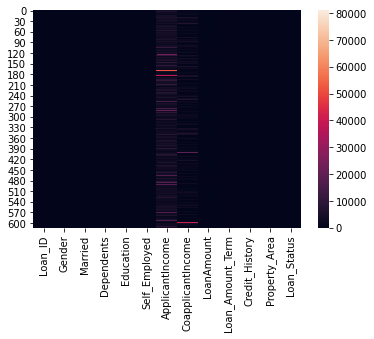

In [132]:
sns.heatmap(df)

No null values present.

<AxesSubplot:>

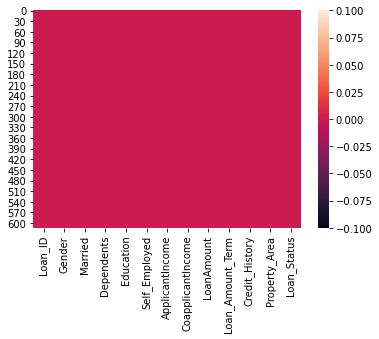

In [133]:
sns.heatmap(df.isnull())

No Null values present.

<AxesSubplot:>

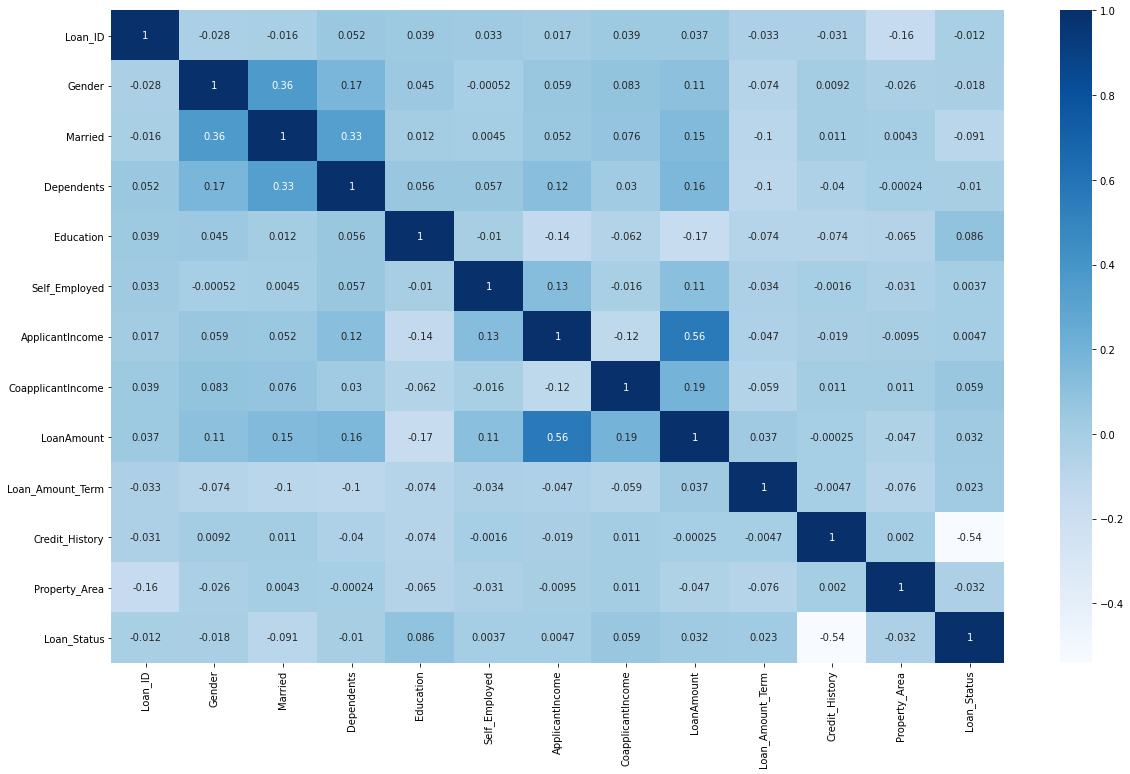

In [134]:
plt.figure(figsize=(20,12))
sns.heatmap(df_cor,cmap='Blues',annot=True)

Loan_Status is highly correlate with Education.
Income is least correlate  with credit_history.

<AxesSubplot:>

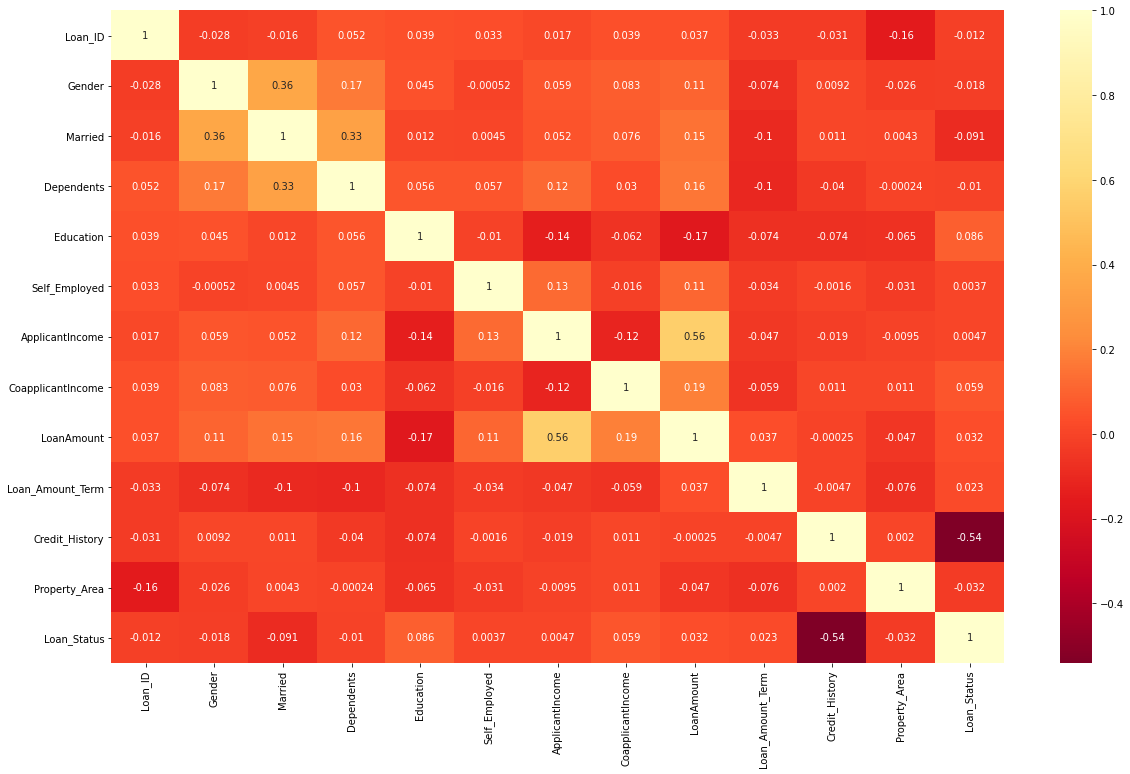

In [135]:
plt.figure(figsize=(20,12))
sns.heatmap(df_cor,cmap='YlOrRd_r',annot=True)

Loan_Status is highly correlate with Education.
Income is least correlate  with Credit_History.

In [136]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:xlabel='Loan_ID', ylabel='Density'>

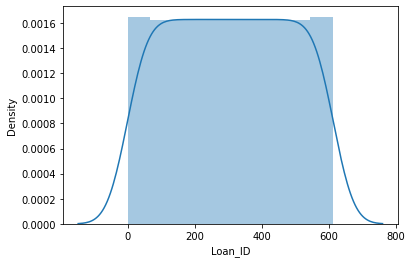

In [137]:
sns.distplot(df['Loan_ID'])

No skewness present.

<AxesSubplot:xlabel='Gender', ylabel='Density'>

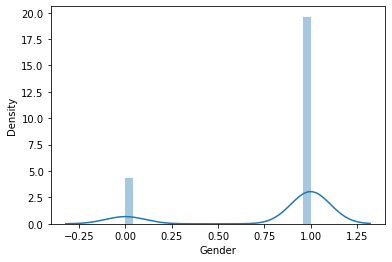

In [138]:
sns.distplot(df['Gender'])

 skewness present.

<AxesSubplot:xlabel='Married', ylabel='Density'>

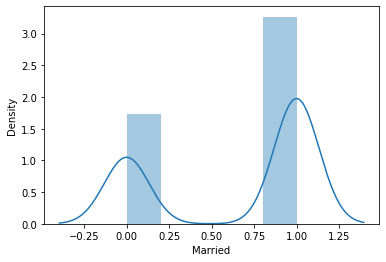

In [139]:
sns.distplot(df['Married'])

skewness present.

<AxesSubplot:xlabel='Dependents', ylabel='Density'>

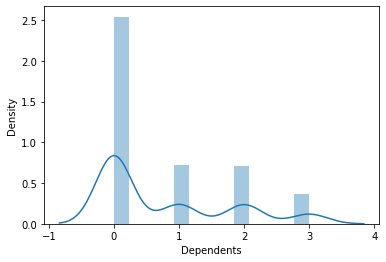

In [140]:
sns.distplot(df['Dependents'])

 skewness present.

<AxesSubplot:xlabel='Education', ylabel='Density'>

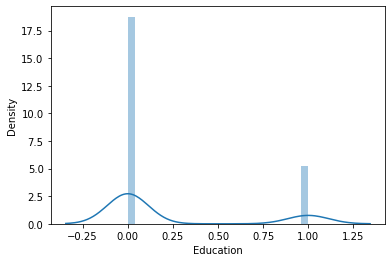

In [141]:
sns.distplot(df['Education'])

 Skewness present.

<AxesSubplot:xlabel='Self_Employed', ylabel='Density'>

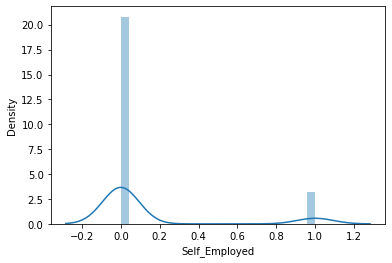

In [142]:
sns.distplot(df['Self_Employed'])

 Skewness present.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

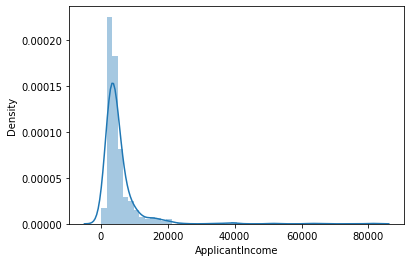

In [143]:
sns.distplot(df['ApplicantIncome'])

Skewness present.

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

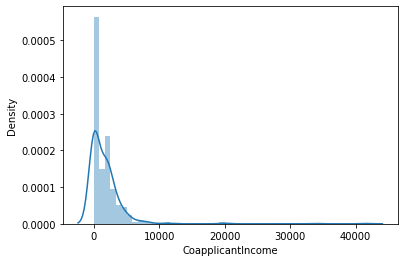

In [144]:
sns.distplot(df['CoapplicantIncome'])

 Skewness present.

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

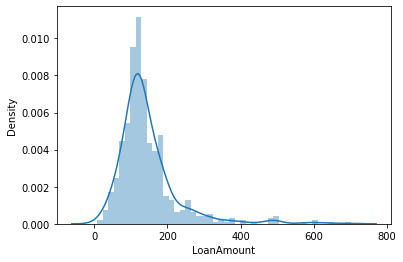

In [145]:
sns.distplot(df['LoanAmount'])

Skewness present.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

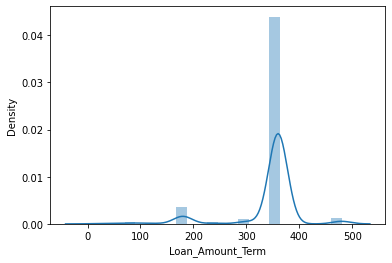

In [146]:
sns.distplot(df['Loan_Amount_Term'])

 Skewness present.

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

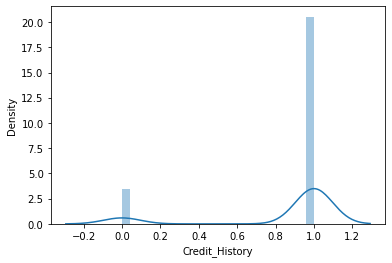

In [147]:
sns.distplot(df['Credit_History'])

skewness present.

<AxesSubplot:xlabel='Property_Area', ylabel='Density'>

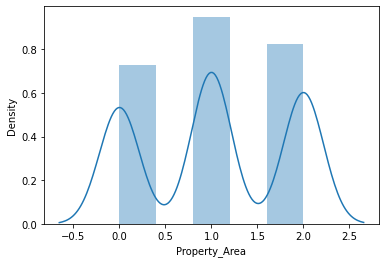

In [148]:
sns.distplot(df['Property_Area'])

skewness present.

<AxesSubplot:xlabel='Loan_Status', ylabel='Density'>

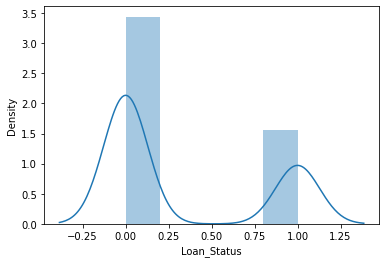

In [149]:
sns.distplot(df['Loan_Status'])

 skewness present.

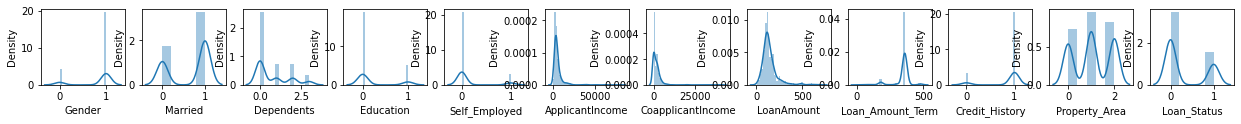

In [150]:
collist=df.columns.values
ncol=14
nrows=15
plt.figure(figsize=(25,25))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

In [151]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:xlabel='Loan_Status', ylabel='Gender'>

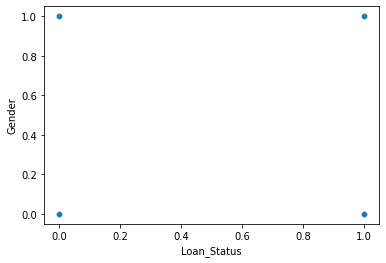

In [164]:
sns.scatterplot(x='Loan_Status',y='Gender',data=df)

Gender is in either 0 or 1 range.

<AxesSubplot:xlabel='Loan_Status', ylabel='Married'>

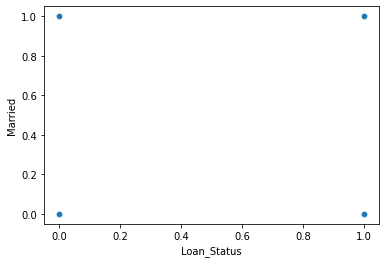

In [165]:
sns.scatterplot(x='Loan_Status',y='Married',data=df)


Married is in 0 and 1 range.

<AxesSubplot:xlabel='Loan_Status', ylabel='Dependents'>

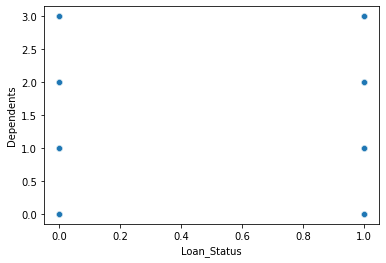

In [166]:
sns.scatterplot(x='Loan_Status',y='Dependents',data=df)


Dependents are distributed in  0 to 3 range.

<AxesSubplot:xlabel='Loan_Status', ylabel='Education'>

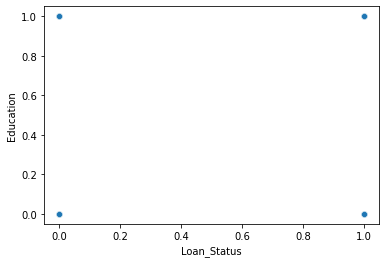

In [168]:
sns.scatterplot(x='Loan_Status',y='Education',data=df)


Education is in 0 and 1 range.

<AxesSubplot:xlabel='Loan_Status', ylabel='Self_Employed'>

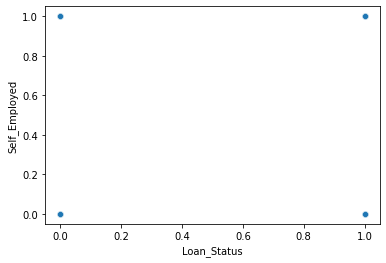

In [169]:
sns.scatterplot(x='Loan_Status',y='Self_Employed',data=df)


Self_Employed is in 0 and 1 range.

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

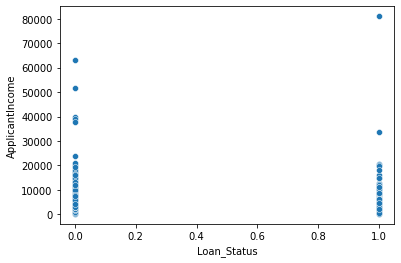

In [170]:
sns.scatterplot(x='Loan_Status',y='ApplicantIncome',data=df)


ApplicantIncome is spreaded from 0 to 25000 range.

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

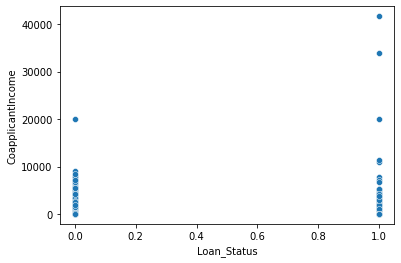

In [171]:
sns.scatterplot(x='Loan_Status',y='CoapplicantIncome',data=df)


CoapplicantIncome is spreaded mainly from 0 to 10000.

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

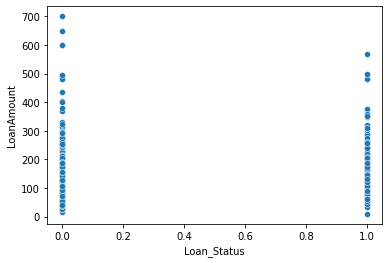

In [172]:
sns.scatterplot(x='Loan_Status',y='LoanAmount',data=df)


LoanAmount is spreaded mainly from 0 to 500 range.

<AxesSubplot:xlabel='Loan_Status', ylabel='Loan_Amount_Term'>

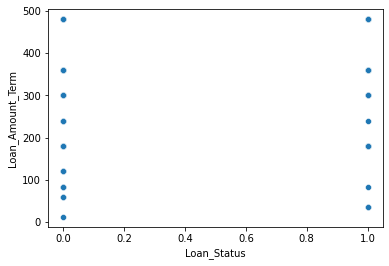

In [173]:
sns.scatterplot(x='Loan_Status',y='Loan_Amount_Term',data=df)


Loan_Status is spreaded from 0 to 500 range.

<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

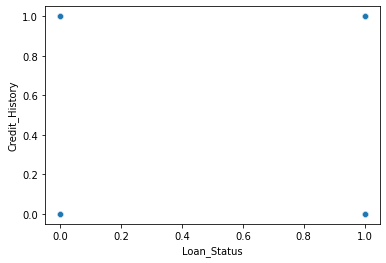

In [174]:
sns.scatterplot(x='Loan_Status',y='Credit_History',data=df)


Credit_History is in range of 0 and 1.

<AxesSubplot:xlabel='Loan_Status', ylabel='Property_Area'>

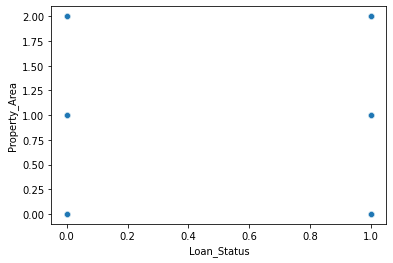

In [175]:
sns.scatterplot(x='Loan_Status',y='Property_Area',data=df)


Property_Area is spreaded in 0,1 and 2 range.

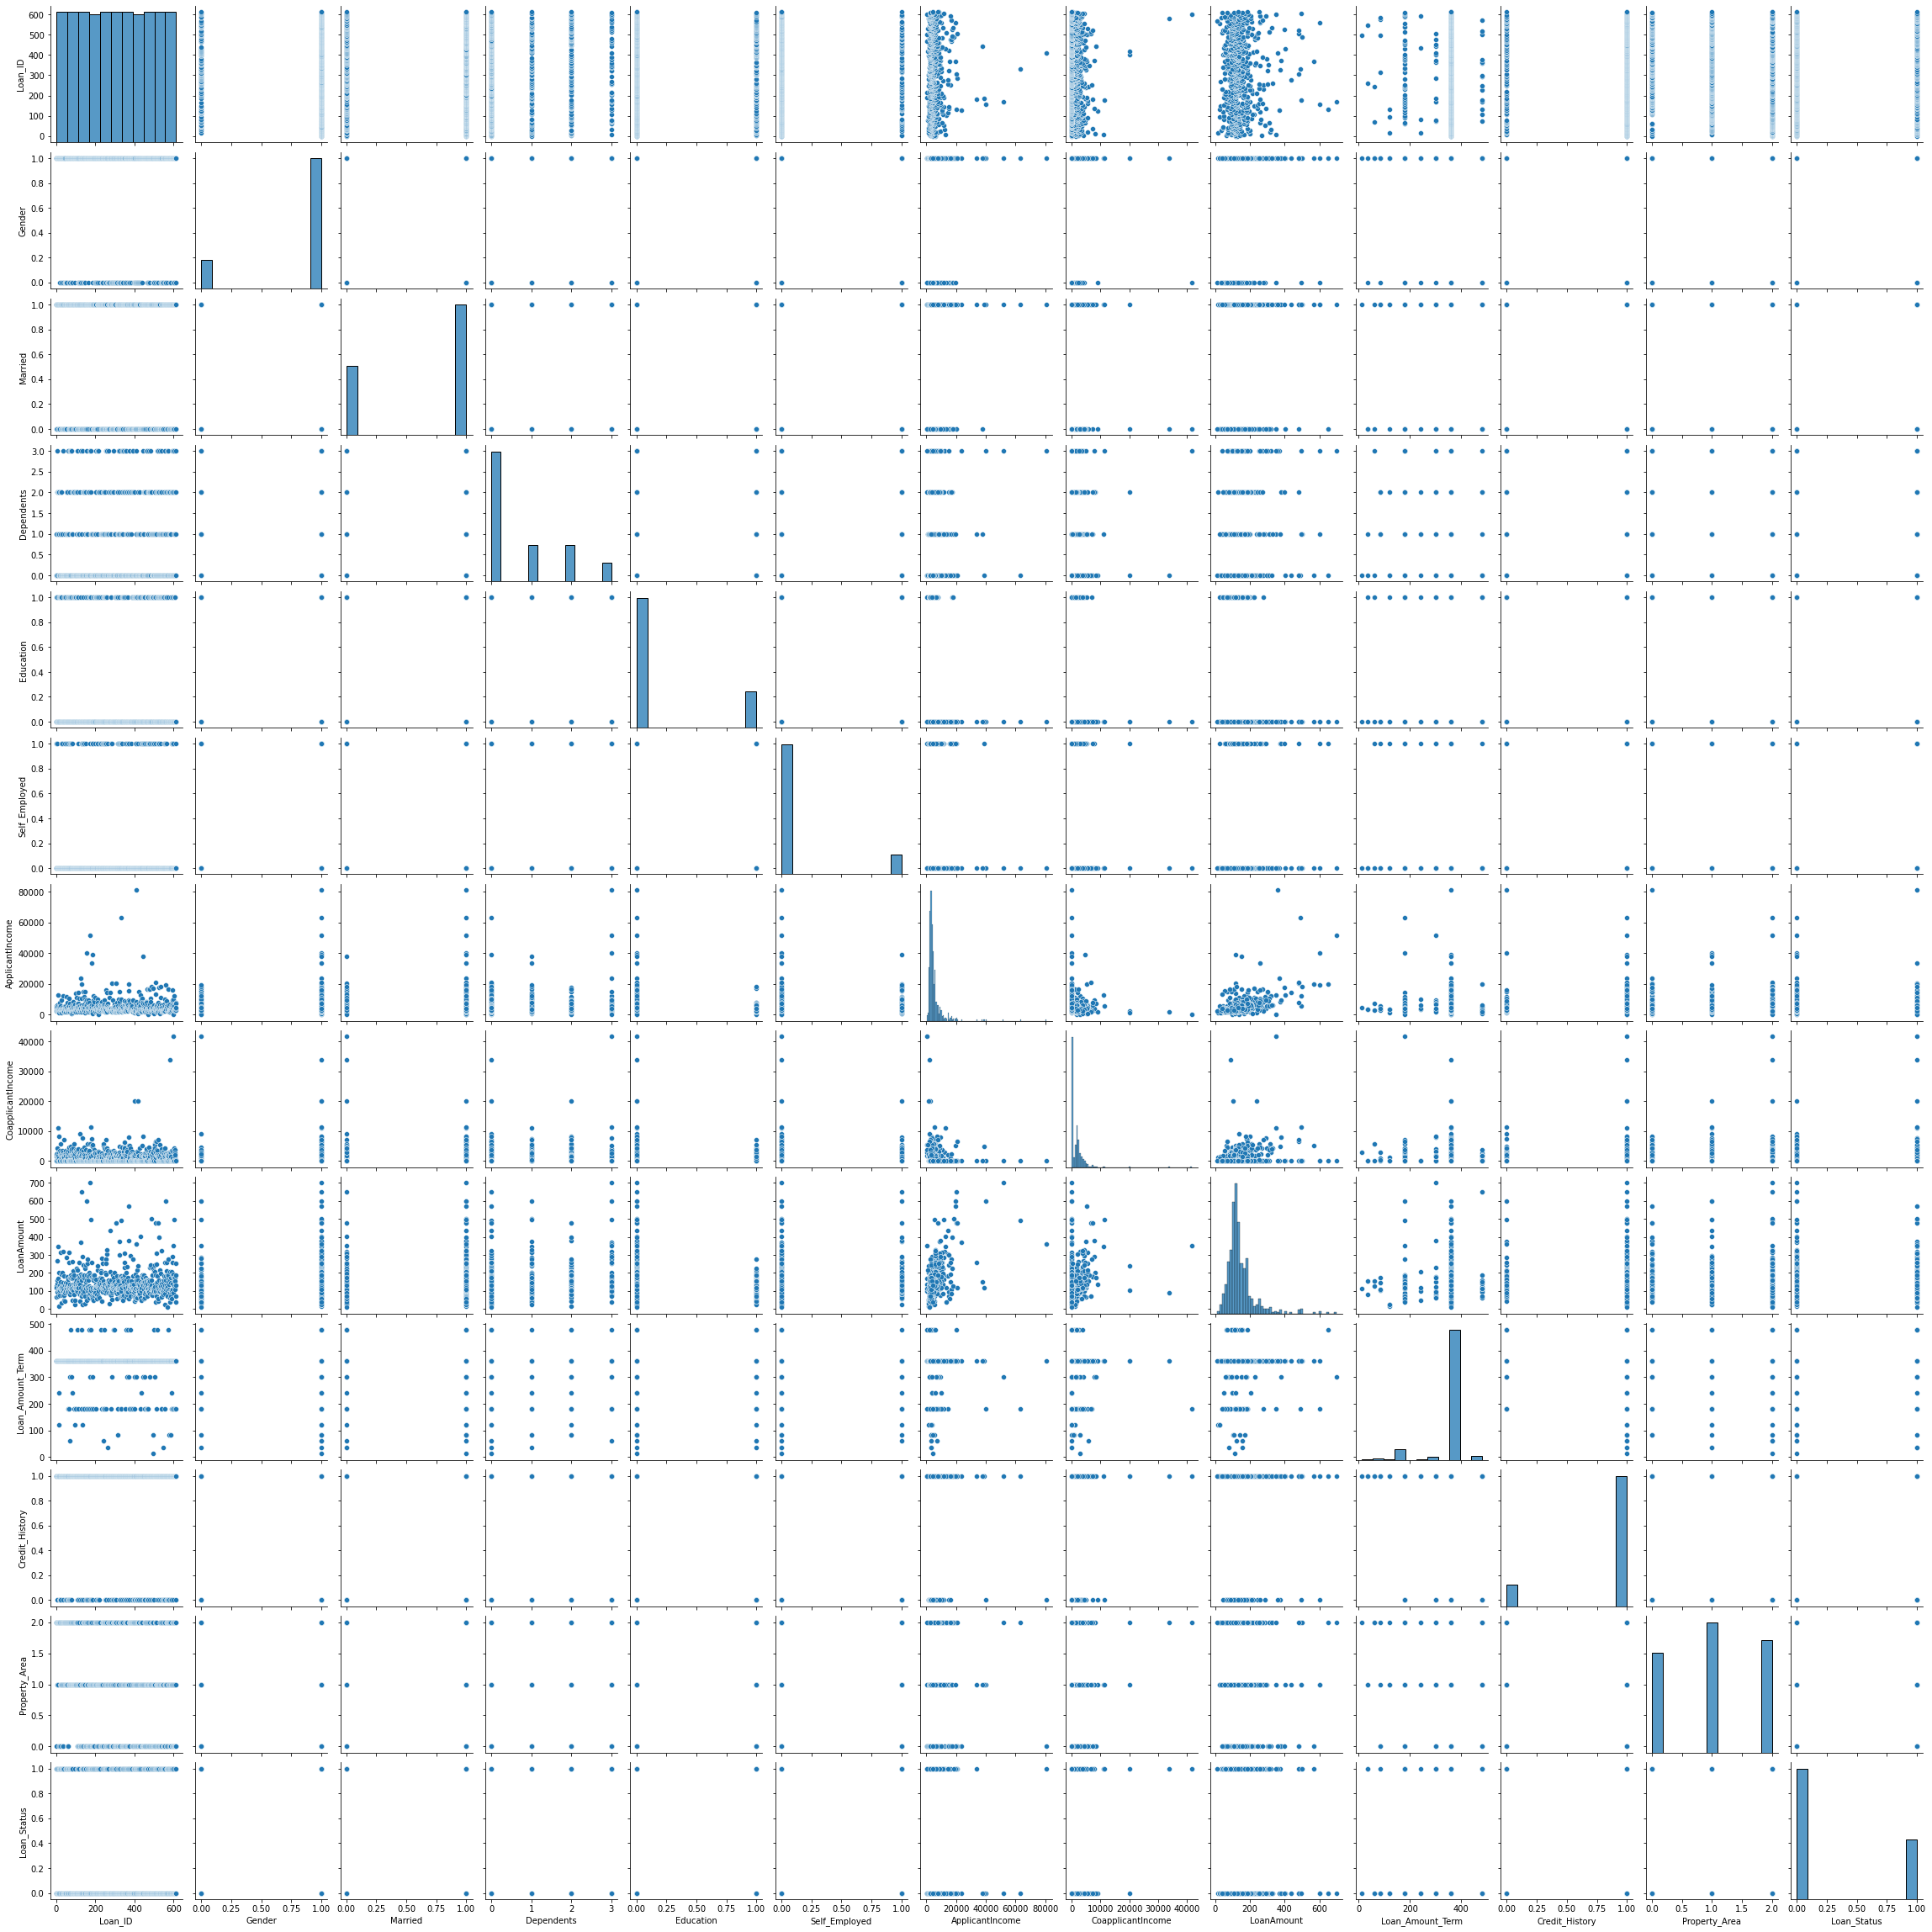

In [163]:
sns.pairplot(df)

In [176]:
df.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.745407
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status          0.809998
dtype: float64

skewness present in ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History.

# Removing Skewness

In [177]:
df['ApplicantIncome']=np.log1p(df['ApplicantIncome'])

In [178]:
df['CoapplicantIncome']=np.log1p(df['CoapplicantIncome'])

In [179]:
df['LoanAmount']=np.log1p(df['LoanAmount'])

In [180]:
df['Loan_Amount_Term']=np.log1p(df['Loan_Amount_Term'])

In [183]:
df['Credit_History']=np.log1p(df['Credit_History'])

In [184]:
df.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.137460
Loan_Amount_Term    -4.801527
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status          0.809998
dtype: float64

In [185]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:>

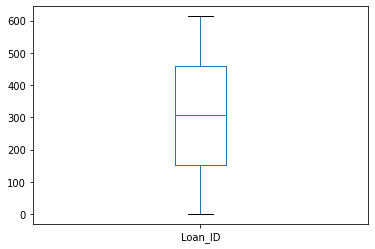

In [186]:
df['Loan_ID'].plot.box()

 NO outliers present.

<AxesSubplot:>

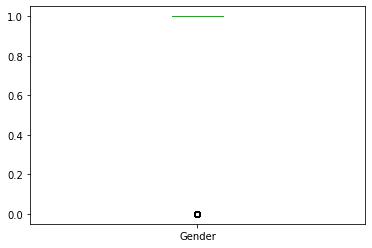

In [187]:
df['Gender'].plot.box()

 outliers present.

<AxesSubplot:>

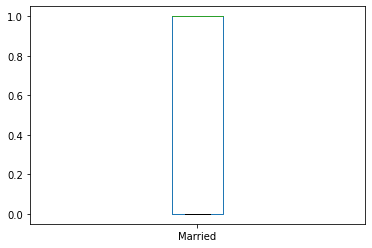

In [188]:
df['Married'].plot.box()

No outliers present.

<AxesSubplot:>

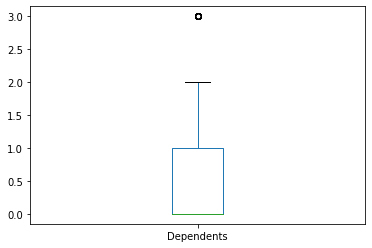

In [189]:
df['Dependents'].plot.box()

 outliers present.

<AxesSubplot:>

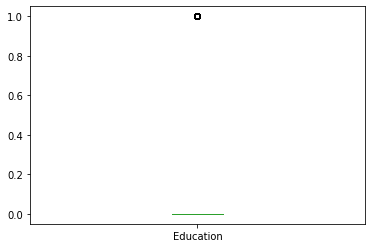

In [190]:
df['Education'].plot.box()

 outliers present.

<AxesSubplot:>

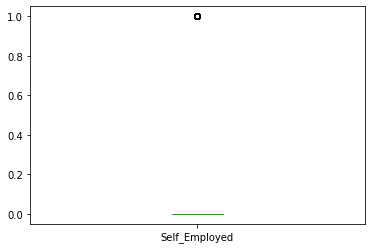

In [191]:
df['Self_Employed'].plot.box()

 outliers present.

<AxesSubplot:>

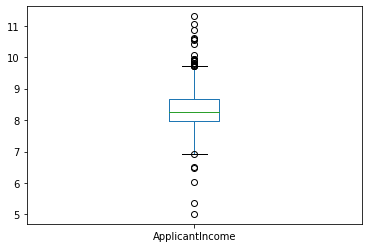

In [192]:
df['ApplicantIncome'].plot.box()

outliers present.

<AxesSubplot:>

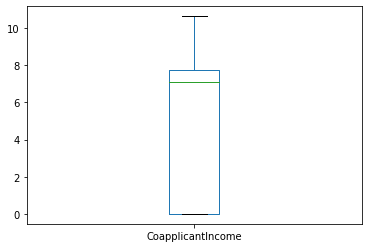

In [193]:
df['CoapplicantIncome'].plot.box()

No outliers present.

<AxesSubplot:>

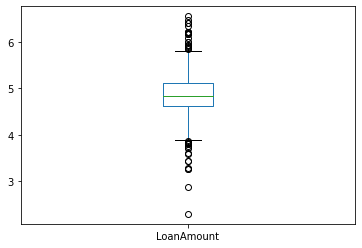

In [194]:
df['LoanAmount'].plot.box()

 outliers present.

<AxesSubplot:>

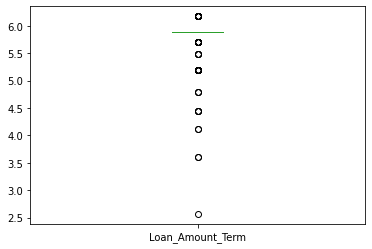

In [195]:
df['Loan_Amount_Term'].plot.box()

outliers present.

<AxesSubplot:>

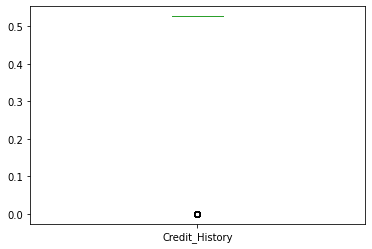

In [196]:
df['Credit_History'].plot.box()

outliers present.

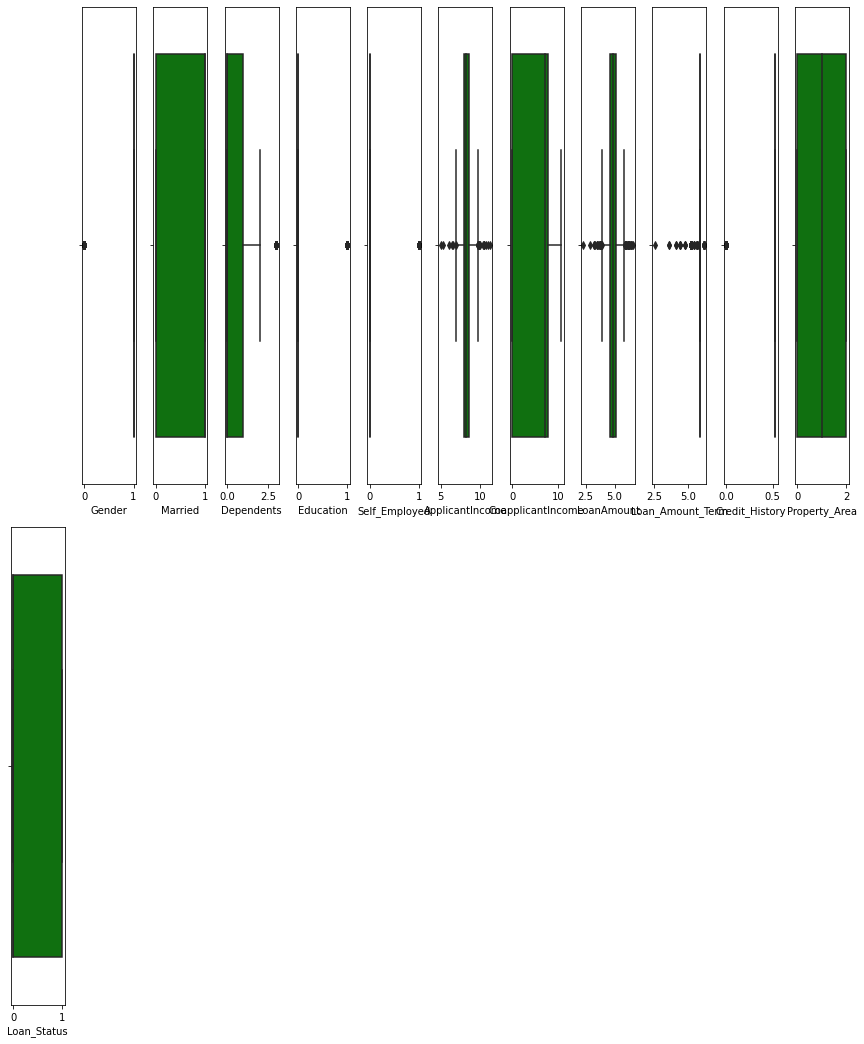

In [201]:
collist=df.columns.values
ncol=12
nrows=10
plt.figure(figsize=(ncol,6*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

Outliers present in Gender,Dependants,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term and Credit_History.

In [203]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [204]:
df.dtypes

Loan_ID                int64
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

# Removing Outliers

In [205]:
from scipy.stats import zscore
z=np.abs(zscore(df[['ApplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]))
print(np.where(z>3))

(array([ 14,  14,  68,  94,  94, 130, 133, 133, 155, 155, 171, 171, 183,
       185, 216, 242, 262, 313, 333, 369, 409, 443, 468, 495, 497, 546,
       555, 561, 568, 575, 585, 600], dtype=int64), array([1, 2, 2, 1, 2, 1, 1, 2, 0, 1, 0, 1, 0, 0, 0, 2, 2, 2, 0, 1, 0, 0,
       0, 2, 2, 2, 1, 1, 1, 2, 2, 0], dtype=int64))


In [206]:
z[14][1]

4.022601495035116

In [207]:
z[68][2]

5.4781640727411824

In [208]:
df1=df[(z<3).all(axis=1)]

In [209]:
df1.shape

(587, 13)

In [210]:
df.shape

(614, 13)

614-587=27 outliers are removed from Dataframe.

In [211]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,8.674197,0.000000,4.795791,5.888878,0.526589,2,0
1,1,1,1,1,0,0,8.430327,7.319202,4.859812,5.888878,0.526589,0,1
2,2,1,1,0,0,1,8.006701,0.000000,4.204693,5.888878,0.526589,2,0
3,3,1,1,0,1,0,7.857094,7.765993,4.795791,5.888878,0.526589,2,0
4,4,1,0,0,0,0,8.699681,0.000000,4.955827,5.888878,0.526589,2,0


In [212]:
x=df.iloc[:,0:-1]




In [213]:
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,0,0,0,8.674197,0.000000,4.795791,5.888878,0.526589,2
1,1,1,1,1,0,0,8.430327,7.319202,4.859812,5.888878,0.526589,0
2,2,1,1,0,0,1,8.006701,0.000000,4.204693,5.888878,0.526589,2
3,3,1,1,0,1,0,7.857094,7.765993,4.795791,5.888878,0.526589,2
4,4,1,0,0,0,0,8.699681,0.000000,4.955827,5.888878,0.526589,2
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,7.972811,0.000000,4.276666,5.888878,0.526589,0
610,610,1,1,3,0,0,8.320448,0.000000,3.713572,5.198497,0.526589,0
611,611,1,1,1,0,0,8.996280,5.484797,5.537334,5.888878,0.526589,2
612,612,1,1,2,0,0,8.933796,0.000000,5.236442,5.888878,0.526589,2


In [216]:
y=df.iloc[:,12]

In [217]:
y

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    0
611    0
612    0
613    1
Name: Loan_Status, Length: 614, dtype: int64

In [218]:
def get_score(model):

    max_i=0
    max_score=0


    for i in range(1,200):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        acc= accuracy_score(y_test,pred)
        #print("accuracy score",acc)

        if(acc > max_score):
            max_score=acc
            max_i=i
    print("max score",max_score)
    print("max i",max_i)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))


In [219]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)
lr=LogisticRegression()
dt=DecisionTreeClassifier()


list=[lr,dt]

for var in list:
    print(var)
    get_score(var)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
max score 0.8620689655172413
max i 8
[[134   3]
 [ 40  26]]
              precision    recall  f1-score   support

           0       0.77      0.98      0.86       137
           1       0.90      0.39      0.55        66

    accuracy                           0.79       203
   macro avg       0.83      0.69      0.70       203
weighted avg       0.81      0.79      0.76       203

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
          

# AUC ROC CURVE¶

In [220]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [221]:
y_pred_prob=dt.predict_proba(x_test)[:,0]

In [222]:
y_pred_prob

array([1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1.])

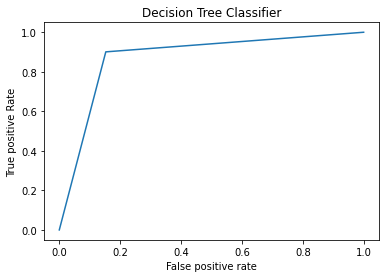

0.873992790500424

In [223]:
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive Rate')
plt.title('Decision Tree Classifier')
plt.show()
auc_score=roc_auc_score(y_test,dt.predict(x_test))
auc_score

# cross validation

In [224]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dt,x,y,cv=7)   
print(score)
print(score.mean(),score.std())

[0.30337079 0.74157303 0.59090909 0.77011494 0.77011494 0.74712644
 0.40229885]
0.6179297262210861 0.17907470645502685


In [225]:

score=cross_val_score(lr,x,y,cv=7)   
print(score)
print(score.mean(),score.std())

[0.83146067 0.76404494 0.77272727 0.79310345 0.85057471 0.81609195
 0.83908046]
0.8095833522024921 0.031110527765538017


# Grid search CV

In [226]:
from sklearn.model_selection import GridSearchCV
grid_param={'criterion':['gini','entropy']}
GSC=GridSearchCV(dt,grid_param,scoring='accuracy',cv=5)
GSC.fit(x,y)
print(GSC.best_params_)
print(GSC.best_score_)

{'criterion': 'entropy'}
0.7068403908794788


logistic regression is the best model as the difference between crossvalidation score and model is least.

# Saving the model

In [227]:
import joblib
joblib.dump(lr,'loanapp.obj')

['loanapp.obj']

In [228]:
file=joblib.load('loanapp.obj')
file.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0], dtype=int64)